In [ ]:
# !pip install ipykernel
# !pip install pydeck
!pip install --upgrade streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.util import pr
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# import streamlit as st

In [ ]:
nltk.download('stopwords')

data = pd.read_csv("labeled_data.csv")
print(data.head())


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data["labels"] = data["class"].map({0: "Hate Speech Detected", 1: "Offensive Language", 2: "No Hate and Offensive"})
print(data.head())

data = data[["tweet", "labels"]]
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  
                                               tweet                 labels
0  !!! RT @mayaso

In [ ]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
print(data.head())

                                               tweet                 labels
0   rt mayasolov woman shouldnt complain clean ho...  No Hate and Offensive
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...     Offensive Language
2   rt urkindofbrand dawg rt  ever fuck bitch sta...     Offensive Language
3             rt cganderson vivabas look like tranni     Offensive Language
4   rt shenikarobert shit hear might true might f...     Offensive Language


In [ ]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

Decision tree classifier

In [36]:
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8762684924807433

In [37]:
prediction = clf.predict(X_test)
print(prediction)

['Offensive Language' 'Offensive Language' 'Offensive Language' ...
 'Offensive Language' 'Offensive Language' 'Offensive Language']


In [38]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

                       precision    recall  f1-score   support

 Hate Speech Detected       0.36      0.32      0.34       465
No Hate and Offensive       0.82      0.82      0.82      1379
   Offensive Language       0.92      0.93      0.93      6335

             accuracy                           0.88      8179
            macro avg       0.70      0.69      0.70      8179
         weighted avg       0.87      0.88      0.87      8179

[[ 151   33  281]
 [  34 1128  217]
 [ 230  217 5888]]


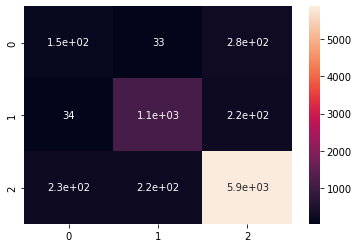

In [69]:
#show heatmap
import pandas as pd
import seaborn as sns
from sklearn import metrics
# sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, prediction)), annot=True, cmap="YlGnBu" ,fmt='g')
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True)

In [41]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the DecisionTreeClassifier on Testing Sample Data:', round(F1_Score,2))

Accuracy of the DecisionTreeClassifier on Testing Sample Data: 0.87


In [50]:
Precision_Score=metrics.precision_score(y_test, prediction, average='weighted')
print('Precision score of DecisionTreeClassifier :',round(Precision_Score,2) )

Precision score of DecisionTreeClassifier : 0.87


In [51]:
Recall=metrics.recall_score(y_test, prediction, average='weighted')
print('Recall score of DecisionTreeClassifier :',round(Recall,2) )

Recall score of DecisionTreeClassifier : 0.88


Support vector machine

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [30]:
sv_prediction = svc.predict(X_test)
print(sv_prediction)

['Offensive Language' 'Offensive Language' 'Offensive Language' ...
 'Offensive Language' 'Offensive Language' 'Offensive Language']


In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, sv_prediction))
print(metrics.confusion_matrix(y_test, sv_prediction))

                       precision    recall  f1-score   support

 Hate Speech Detected       0.56      0.06      0.12       465
No Hate and Offensive       0.80      0.89      0.84      1379
   Offensive Language       0.92      0.96      0.94      6335

             accuracy                           0.90      8179
            macro avg       0.76      0.64      0.63      8179
         weighted avg       0.88      0.90      0.88      8179

[[  30   61  374]
 [   2 1234  143]
 [  22  256 6057]]


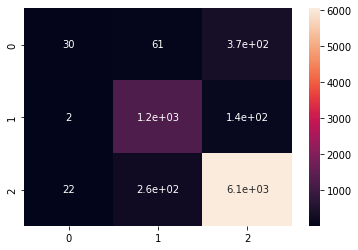

In [32]:
import seaborn as sns
from sklearn import metrics
sns.heatmap(metrics.confusion_matrix(y_test, sv_prediction), annot=True)

In [35]:
# Printing the Overall Accuracy of the svm model
F1_Score=metrics.f1_score(y_test, sv_prediction, average='weighted')
print('Accuracy of SVM the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of SVM the model on Testing Sample Data: 0.88


In [46]:
Precision_Score=metrics.precision_score(y_test, sv_prediction, average='weighted')
print('Precision of SVM:',round(Precision_Score,2) )

Precision of SVM: 0.88


Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()